## Mutual Information for ICA

In [2]:
from google_drive_downloader import GoogleDriveDownloader as gdd
gdd.download_file_from_google_drive(file_id='1-hwYUvl5iKi9DZGY2QusjM4cmL3EWh0C',
                                    dest_path='./data/KOS_DAS.mat',
                                    unzip=False)

In [245]:
import time
import sys
sys.stdout.write("\r{}".format(i))
sys.stdout.flush()

3

In [89]:
import scipy.io as sio
mat_contents = sio.loadmat('/Users/RomanKoshkin/Documents/MATLAB/EEG.mat')

In [90]:
# Ossadtchi et al. (2014) doi: 10.3389/fninf.2013.00053
# Mutual information spectrum for selection of event-related spatial components.

import scipy.stats as ss
import sklearn.metrics as sm

X = mat_contents['X'] # raw EEG
S = mat_contents['S'] # Independent components (EEG after ICA decomposition)
xedges = np.linspace(-100,100,100).tolist()
yedges = np.linspace(-100,100,100).tolist()

MIN = []

comp = 1
chan = 12

plt.figure(figsize=(15,5))

# We use 2D histogram find the probability of X-values within certain ranges given
# certain S-values falling into certain ranges:
H,_,_ = np.histogram2d(X[chan-1,:],S[comp-1,:], bins=(xedges, yedges), density=True)

# for avoid division by zero, we replace zeros by extremely low values:
for x in range(99):
    for y in range(99):
        H[x,y] = 2.2204460492503131e-16 if H[x,y]==0 else H[x,y]

plt.subplot(1,3,1)
plt.imshow(H)
plt.ylabel('S__' + str(np.std(S[comp-1,:])))
plt.xlabel('X__' + str(np.std(X[chan-1,:])))

print("abmin \t", np.min(np.sum(H,axis=1)))

P_x = np.sum(H,axis=1)
P_s = np.sum(H,axis=0)
plt.subplot(1,3,2)
plt.plot(P_x, label='X')
plt.plot(P_s, label='S')
plt.legend()

plt.subplot(1,3,3)
plt.plot(X[chan-1,1:400], label=str('Chan ' + str(chan+1)))
plt.plot(S[comp-1,1:400], label=str('Comp. ' + str(comp+1)))
plt.legend()


# entropy H(C):
ent = 0

# for x in range(99):
#     ent += - P_s[x] * np.log(P_s[x])
# print('H(C)\t', ent)
ent = ss.entropy(P_s)

ent_e = 0
# for x in range(99):
#     ent_e += - P_x[x] * np.log(P_x[x])
# print(ent_e)
ent_e = ss.entropy(P_x)

# conditional entropy  H(C|X)
ce = 0
for x in range(99):
    for y in range(99):
        ce += - H[x][y]*np.log(H[x][y]/P_x[x])
print('H(C|X)\t', ce)

print(ce)

MI = ent - ce
MI_norm = MI/np.sqrt(ent*ent_e)
MIN.append(MI_norm)
print('MI \t', MI)
print('MI_no \t', MI_norm)

KeyError: 'S'

In [ ]:
MIN = []
for i in range(63):
    H,_,_ = np.histogram2d(X[i,:],S[0,:], bins=(xedges, yedges))
    MIN.append(sm.mutual_info_score(None, None, contingency=H))

for k in range(len(MIN)):
    print(MIN[k])

In [ ]:
import scipy.stats as ss
import sklearn.metrics as sm

X = mat_contents['X']
S = mat_contents['S']
xedges = np.linspace(-25,25,100).tolist()
yedges = np.linspace(-25,25,100).tolist()

MIN = []
for k in range(63):
    comp = 0
    chan = k


    # plt.figure(figsize=(15,5))
    
    numBins = 100  # number of bins in each dimension
    data = np.vstack([X[chan,:], S[comp,:]]).T
    # We use 2D histogram find the probability of X-values within certain ranges given
    # certain S-values falling into certain ranges:
    jointProbs, edges = np.histogramdd(data, bins=(xedges,yedges))
    jointProbs /= jointProbs.sum()
    H = jointProbs

    for x in range(100):
        for y in range(100):
            H[x,y] = 2.2204460492503131e-16 if H[x,y]==0 else H[x,y]

    # plt.subplot(1,3,1)
    # plt.imshow(H)
    # plt.ylabel('S__' + str(np.std(S[comp-1,:])))
    # plt.xlabel('X__' + str(np.std(X[chan-1,:])))

#     print("abmin \t", np.min(np.sum(H,axis=1)))

    P_x = np.sum(H,axis=1)
    P_s = np.sum(H,axis=0)
    # plt.subplot(1,3,2)
    # plt.plot(P_x, label='X')
    # plt.plot(P_s, label='S')
    # plt.legend()

    # plt.subplot(1,3,3)
    # plt.plot(X[chan-1,1:400], label=str('Chan ' + str(chan+1)))
    # plt.plot(S[comp-1,1:400], label=str('Comp. ' + str(comp+1)))
    # plt.legend()


    # entropy H(C):
    ent = 0
    for x in range(100):
        ent += - P_s[x] * np.log(P_s[x])
#     print('H(C)\t', ent)
#     ent = ss.entropy(P_s) Entropy can be calculated like this too

    ent_e = 0
    for x in range(100):
        ent_e += - P_x[x] * np.log(P_x[x])
#     print(ent_e)
#     ent_e = ss.entropy(P_x)

    # conditional entropy  H(C|X)
    ce = 0
    for x in range(100):
        for y in range(100):
            ce += - H[x][y]*np.log(H[x][y]/P_x[x])
#     ce = ss.entropy(H.flatten()) - ss.entropy(P_x.flatten()) Conditional entropy can be calculated like this too
#     print('H(C|X)\t', ce)

    MI = ent - ce
    MI_norm = MI/np.sqrt(ent*ent_e)
    MIN.append(MI_norm)
#     print('MI \t', MI)
#     print('MI_no \t', MI_norm)

for k in range(len(MIN)):
#     print(k+1, MIN[k])
    print(MIN[k])

In [2]:
# Ossadtchi et al. (2014) doi: 10.3389/fninf.2013.00053
# Mutual information spectrum for selection of event-related spatial components.

import scipy.stats as ss
import sklearn.metrics as sm
import scipy.io as sio
import numpy as np

mat_contents = sio.loadmat('/Users/RomanKoshkin/Documents/MATLAB/EEG.mat')

X = mat_contents['X']
S = mat_contents['S']
xedges = np.linspace(-25,25,100).tolist()
yedges = np.linspace(-25,25,100).tolist()

MIN = []
for k in range(63):
    comp = k
    chan = 15


    # plt.figure(figsize=(15,5))
    
    numBins = 100  # number of bins in each dimension
    data = np.vstack([X[chan,:], S[comp,:]]).T
    jointProbs, edges = np.histogramdd(data, bins=100)
    jointProbs /= jointProbs.sum()
    H = jointProbs

    for x in range(100):
        for y in range(100):
            H[x,y] = 2.2204460492503131e-16 if H[x,y]==0 else H[x,y]

    # plt.subplot(1,3,1)
    # plt.imshow(H)
    # plt.ylabel('S__' + str(np.std(S[comp-1,:])))
    # plt.xlabel('X__' + str(np.std(X[chan-1,:])))

#     print("abmin \t", np.min(np.sum(H,axis=1)))

    P_x = np.sum(H,axis=1)
    P_s = np.sum(H,axis=0)
    # plt.subplot(1,3,2)
    # plt.plot(P_x, label='X')
    # plt.plot(P_s, label='S')
    # plt.legend()

    # plt.subplot(1,3,3)
    # plt.plot(X[chan-1,1:400], label=str('Chan ' + str(chan+1)))
    # plt.plot(S[comp-1,1:400], label=str('Comp. ' + str(comp+1)))
    # plt.legend()


    MI = 0
    for x in range(100):
        for y in range(100):
            MI += H[x][y]*np.log(H[x][y]/(P_x[x]*P_s[y]))

    MIN.append(MI)

for k in range(len(MIN)):
#     print(k+1, MIN[k])
    print(MIN[k])

0.3762269687474964
0.34169295662488397
0.08773787379322544
0.018521993592563138
0.059879545987495765
0.004210888913683867
0.006629173517699418
0.003107922444263009
0.016392237413030857
0.008770113111078533
0.0036871166624897833
0.009777093542438678
0.009187679981168442
0.0025009163821034545
0.0016089012072337957
0.002941608731620268
0.0047070875515610264
0.0033902998661114662
0.004181851214415295
0.00493813483003859
0.0027755469047179323
0.0022586414638805434
0.0026548667912150202
0.003646405917493721
0.0009022666948368659
0.003012482045890431
0.0027349954068761713
0.0288108050030278
0.0008144123073899131
0.0018419577543219237
0.0024018625093558017
0.004978905047054633
0.0038299128166934876
0.0016762991334809373
0.0018984330556382418
0.003556691958532648
0.001536350895449623
0.0024576999615542818
0.002558707682379597
0.003375537039233549
0.00347525411895763
0.0022205756842291345
0.0013354906380799263
0.001862352790925288
0.0021296608959895514
0.0017684367318287076
0.001875122114424129


# Basic facts about Marginal and Joint distributions:
![title](dist.png)
- marginal distrubutions are obtained by summing the rows and columns of the joint distribution (**not** but multiplying the elements of the marginals!!). The marginals can be independent or dependent on each other, and if we multiply them, we cannot magically obtain information about their (in)dependence. If the table below, we see that V1 and V2 are dependent (if you get **red** in V1 there's a 0.4 chance getting **red** in V2).

|      |      | V2   |V2    |      |
|------|------|------|------|------|
|      |      | RED  |BLUE  |**M2**|
|**V1**| RED  | 0.4  | 0.1  | 0.5  |
|**V1**| BLUE | 0.1  | 0.4  | 0.5  |
|      |**M1**| 0.5  | 0.5  | 1.0  |

But if you started from the marginals and tried to get the joint distribution from them, you'd lose dependence information:

|      |      | V2   |V2    |      |
|------|------|------|------|------|
|      |      | RED  |BLUE  |**M2**|
|**V1**| RED  | 0.25 | 0.25 | 0.5  |
|**V1**| BLUE | 0.25 | 0.25 | 0.5  |
|      |**M1**| 0.5  | 0.5  | 1.0  |

- Both each marginal distribution and the joint distribution always sum to 1.

Now let's compute **Mutual Information**:
$$
{MI} (X;Y)=\sum _{y\in {\mathcal {Y}}}\sum _{x\in {\mathcal {X}}}{p_{(X,Y)}(x,y)\log {\left({\frac {p_{(X,Y)}(x,y)}{p_{X}(x)\,p_{Y}(y)}}\right)}}
$$
where $P_{(X,Y)}$ is the joint probability of variable $X$ and variable $Y$, $P_{(X)}$ and $P_{(Y)}$ are marginal disributions of these variables, respectively.

To obtained normed mutual information, $MI^*$, that is scaled to the range of [0,1], we divide it by the square root of the sum of the variables' entropies $H(X) = -\sum p(x) \log p(x)$:

$$
{MI^*} = \frac{MI}{\sqrt{H(X) + H(Y)}}
$$

## Remember: to compute mutual information, you need to always start with $P_{(X,Y)}$, which is a normed 2D histogram of the two variables.


In [490]:
def entropy(x):
    entropy = 0
    x = x.flatten()
    for i in range(len(x)):
        entropy += -x[i]*torch.log(x[i])
    return entropy

def MI(JD, MD1, MD2):
    MI = 0
    for i in range(len(MD1)):
        for j in range(len(MD2)):
            if JD[i,j]>0 and P[i]>0 and Q[i]>0:
                MI += JD[i,j]*torch.log(JD[i,j]/(P[i]*Q[j]))
            else:
                pass
    return MI/torch.sqrt(entropy(MD1)+entropy(MD2))
    

JD = torch.FloatTensor([[0.4, 0.1],[0.1, 0.4]])
P = JD.sum(dim=0) # marginal distribution of variable 1
Q = JD.sum(dim=1) # marginal distribution of variable 2

# H = torch.matmul(P.view(-1,1),Q.view(1,-1)).detach().numpy()
print('Joint Dist:\n', JD)
print('Marginal dist1:\t', P)
print('Marginal dist2:\t', Q)
print('Entropy P:\t', entropy(P))
print('Entropy Q:\t', entropy(Q))
print('Entropy JD:\t', entropy(JD))
print('Normed MI:\t', MI(JD, P, Q))

Joint Dist:
 tensor([[0.4000, 0.1000],
        [0.1000, 0.4000]])
Marginal dist1:	 tensor([0.5000, 0.5000])
Marginal dist2:	 tensor([0.5000, 0.5000])
Entropy P:	 tensor(0.6931)
Entropy Q:	 tensor(0.6931)
Entropy JD:	 tensor(1.1935)
Normed MI:	 tensor(0.1637)


#### Or you can compute MI using another formula:
$$ {MI^*} = \frac{H(X) + H(Y) - H(X,Y)}{\sqrt{H(X) + H(Y)}} $$

In [493]:
H1 = entropy(P)
H2 = entropy(Q)
JE = entropy(JD)
MI = (H1 + H2 - JE)/torch.sqrt(H1+H2)
print('Normed MI:\t', MI)

Normed MI:	 tensor(0.1637)


#### Or even through KL divergence
$${\displaystyle MI(X;Y)=D_{\mathrm {KL} }(P_{(X,Y)}\|P_{X}\otimes P_{Y})}$$

$${\displaystyle D_{\text{KL}}(P\parallel Q)=-\sum _{x\in {\mathcal {X}}}P(x)\log \left({\frac {Q(x)}{P(x)}}\right)}$$

In [492]:
MI = - torch.dot(JD.flatten(), (torch.matmul(Q.view(-1,1), P.view(1,-1)).div(JD)).log().flatten())
print('Unnormed MI:\t', MI)
MI = MI/torch.sqrt(H1+H2)
print('Normed MI:\t', MI)

Unnormed MI:	 tensor(0.1927)
Normed MI:	 tensor(0.1637)


## Now let's do the same on real EEG data:

(60, 500)


Text(0.5,1,'Marginal Distributions')

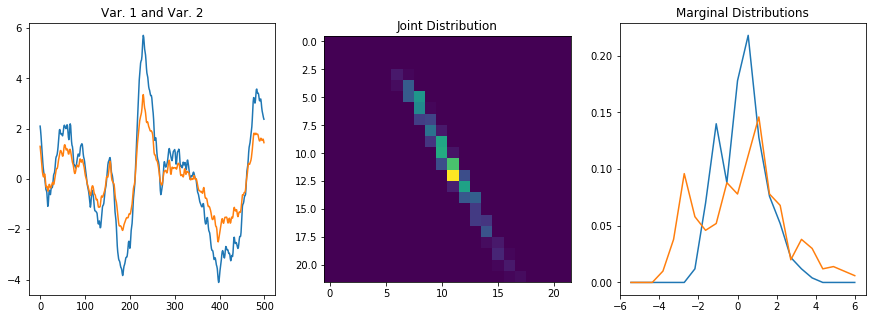

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
mat_contents = sio.loadmat('/Users/RomanKoshkin/Documents/MATLAB/EEG.mat')


dat = mat_contents['X'].mean(axis=0)
print(dat.shape)
X = dat[32,:].flatten()
S = dat[33,:].flatten()
# S = dat[10,:].flatten()

granularity = 23
xedges = np.linspace(-6,6,granularity).tolist()
yedges = np.linspace(-6,6,granularity).tolist()

JD,_,_ = np.histogram2d(X,S, bins=(xedges, yedges), density=False)
JD = JD/np.sum(JD)

# for avoid division by zero, we replace zeros by extremely low values:
# for x in range(granularity-1):
#     for y in range(granularity-1):
#         JD[x,y] = 2.2204460492503131e-16 if JD[x,y]==0 else JD[x,y]

plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
plt.plot(X)
plt.plot(S)
plt.title('Var. 1 and Var. 2')
plt.subplot(1,3,2)
plt.imshow(JD)
plt.title('Joint Distribution')
plt.subplot(1,3,3)
plt.plot(xedges[1:], JD.sum(axis=0))
plt.plot(xedges[1:], JD.sum(axis=1))
plt.title('Marginal Distributions')

In [9]:
# entropy of var #1
P = JD.sum(axis=0)
H1 = 0
for i in range(len(P)):
    if P[i]>0:
        H1 += -P[i]*np.log(P[i])
    else:
        pass
print('Entropy of Var. #1:\t', H1)

Entropy of Var. #1:	 2.1395014855363037


In [10]:
# entropy of var #2
Q = JD.sum(axis=1)
H2 = 0
for i in range(len(Q)):
    if Q[i]>0:
        H2 += -Q[i]*np.log(Q[i])
    else:
        pass
print('Entropy of Var. #2:\t', H2)

Entropy of Var. #2:	 2.6738577432932296


In [11]:
# joint entropy
JE = 0
for i in range(len(P)):
    for j in range(len(Q)):
        if JD[i,j]>0:
            JE += -JD[i,j]*np.log(JD[i,j])
        else:
            pass
print('Entropy of the joint distribution of Var. #1 and Var.2:\t', H2)

Entropy of the joint distribution of Var. #1 and Var.2:	 2.6738577432932296


In [12]:
MI = (H1 + H2 - JE)/np.sqrt(H1+H2)
MI

0.7616382637871798

In [13]:
MI = 0
for j in range(len(Q)):
    for i in range(len(P)):
        if JD[i,j]>0 and P[i]>0 and Q[j]>0:
            MI += JD[i,j]*np.log(JD[i,j]/(P[i]*Q[j]))
        else:
            pass
MI
MI/np.sqrt(H1+H2)

0.7303552537149037